In [7]:
import pandas as pd
import sqlite3
import time
import jieba
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

conn = sqlite3.connect('../sqlite3/qq.db')
cur = conn.cursor()

cur.execute('select * from groupInfo')
groups = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from member')
members = pd.DataFrame(list(cur.fetchall()))
cur.execute('select * from message')
messages = pd.DataFrame(list(cur.fetchall()))

GROUPID = 745864592
groupInfo = groups.loc[groups[0] == GROUPID]
groupMessage = messages.loc[messages[2] == GROUPID]
groupMember = members.loc[members[0] == GROUPID]

print('2. 单群分析')
print(f'此次分析的群为 {groupInfo.iloc[0, 1]}, 群人数为 {groupInfo.iloc[0, 2]} 人, 总消息数为 {groupMessage.shape[0]} 条')
print('---- 开始分析 ----')

2. 单群分析
此次分析的群为 Daser悠着点飞, 群人数为 133 人, 总消息数为 417 条
---- 开始分析 ----


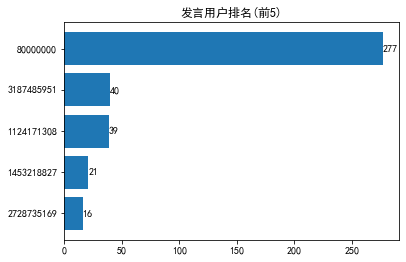

这个群发言以匿名居多, 发言数达到了 277!
接下来的是
用户 跑路跑路, 发言数 40!
用户 minGmaxD ExlogD(x)+Ezlog(1-D(G(z))), 发言数 39!
用户 祁岫尧., 发言数 21!
用户 伍玖, 发言数 16!


In [8]:
RANK = 5
messageUserCount = groupMessage.groupby(3)[3].count().sort_values()

chart = plt.barh(range(RANK), messageUserCount[-RANK:], tick_label=messageUserCount.keys()[-RANK:])
plt.bar_label(chart, label_type='edge')
plt.title(f'发言用户排名(前{RANK})')
plt.show()

topUser = []
for i in range(1, RANK+1):
    if messageUserCount.keys()[-i] == 80000000:
        topUser.append('tmp')
        if i == 1:
            print(f'这个群发言以匿名居多, 发言数达到了 {messageUserCount.iloc[-i]}!')
            print(f'接下来的是')
        else:
            print(f'匿名用户, 发言数 {messageUserCount.iloc[-i]}!')
        continue
    topUser.append(members.loc[members[1] == messageUserCount.keys()[-i]])
    if i == 1:
        print(f'记录到的消息中发言最多的用户是 {topUser[i - 1].iloc[0, 2]}, 发言数达到了 {messageUserCount.iloc[-i]}!')
        print(f'接下来的是')
    else:
        print(f'用户 {topUser[i - 1].iloc[0, 2]}, 发言数 {messageUserCount.iloc[-i]}!')

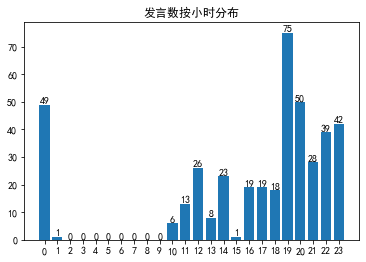

有效性取决于软件开启时间段


In [9]:
messageHourCount = [0] * 24
for message in groupMessage.values:
    messageHourCount[time.localtime(message[6]).tm_hour] += 1

chart = plt.bar(range(24), messageHourCount, tick_label=range(24))
plt.bar_label(chart, label_type='edge')
plt.title(f'发言数按小时分布')
plt.show()
print('有效性取决于软件开启时间段')

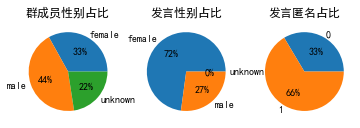

发言占比中男性占比上升了 -17%
女性占比上升了 39%


In [10]:
memberSexCount = groupMember.groupby(4)[4].count()
messageAnonymousCount = groupMessage.groupby(4)[4].count()
messageSexCount = {'female': 0, 'male': 0, 'unknown': 0}
for i in messageUserCount.keys():
    if not members.loc[members[1] == i].empty:
        messageSexCount[members.loc[members[1] == i].iloc[0, 4]] += messageUserCount.loc[i]

plt.subplot(131)
plt.title('群成员性别占比')
plt.pie(memberSexCount, labels=memberSexCount.keys(), autopct='%d%%')
plt.subplot(132)
plt.title('发言性别占比')
plt.pie(messageSexCount.values(), labels=messageSexCount.keys(), autopct='%d%%')
plt.subplot(133)
plt.title('发言匿名占比')
plt.pie(messageAnonymousCount, labels=messageAnonymousCount.keys(), autopct='%d%%')
plt.show()

print('发言占比中男性占比上升了 %d%%' % ((messageSexCount['male'] / sum(messageSexCount.values()) - memberSexCount.loc['male'] / sum(memberSexCount)) * 100))
print('女性占比上升了 %d%%' % ((messageSexCount['female'] / sum(messageSexCount.values()) - memberSexCount.loc['female'] / sum(memberSexCount)) * 100))

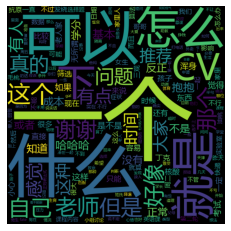

所有记录到的消息的词云图


In [11]:
text = ''
words = []
def handle(matched):
    return ''
for message in groupMessage.values:
    text += re.sub('\[CQ.*?\]', handle, message[5])
segs = jieba.lcut(text)
for seg in segs:
    if len(seg) > 1:
        words.append(seg)
cloudPic = WordCloud(font_path='msyh.ttc', width=500, height=500).generate(' '.join(words))
plt.imshow(cloudPic)
plt.axis('off')
plt.show()
print('所有记录到的消息的词云图')

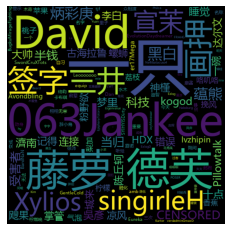

所有成员昵称的词云图


In [12]:
text = ''
words = []
for member in groupMember.values:
    text += member[2]
segs = jieba.lcut(text)
for seg in segs:
    if len(seg) > 1:
        words.append(seg)
cloudPic = WordCloud(font_path='msyh.ttc', width=500, height=500).generate(' '.join(words))
plt.imshow(cloudPic)
plt.axis('off')
plt.show()
print('所有成员昵称的词云图')